# **Project description**

In [ ]:
# This EDA Is of Airbnb booking Analysis

## **Business Context**

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Data Description**

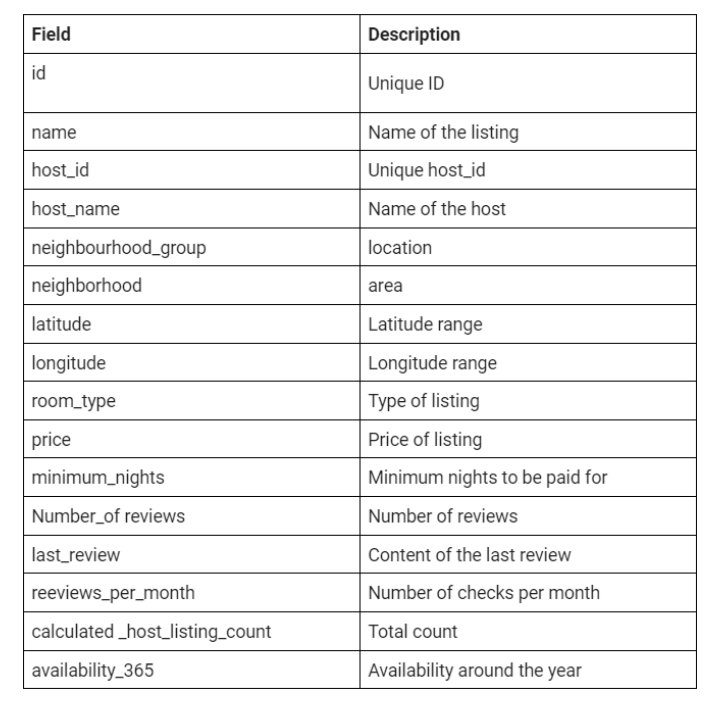

## **Main libraries Used**



*   Pandas for data manipulation and aggregation
*   NumPy for computational efficient operation
*   Matplotlib and Seaborn for visualization and behaviour with respect to target variable. 





## **Project architecture**

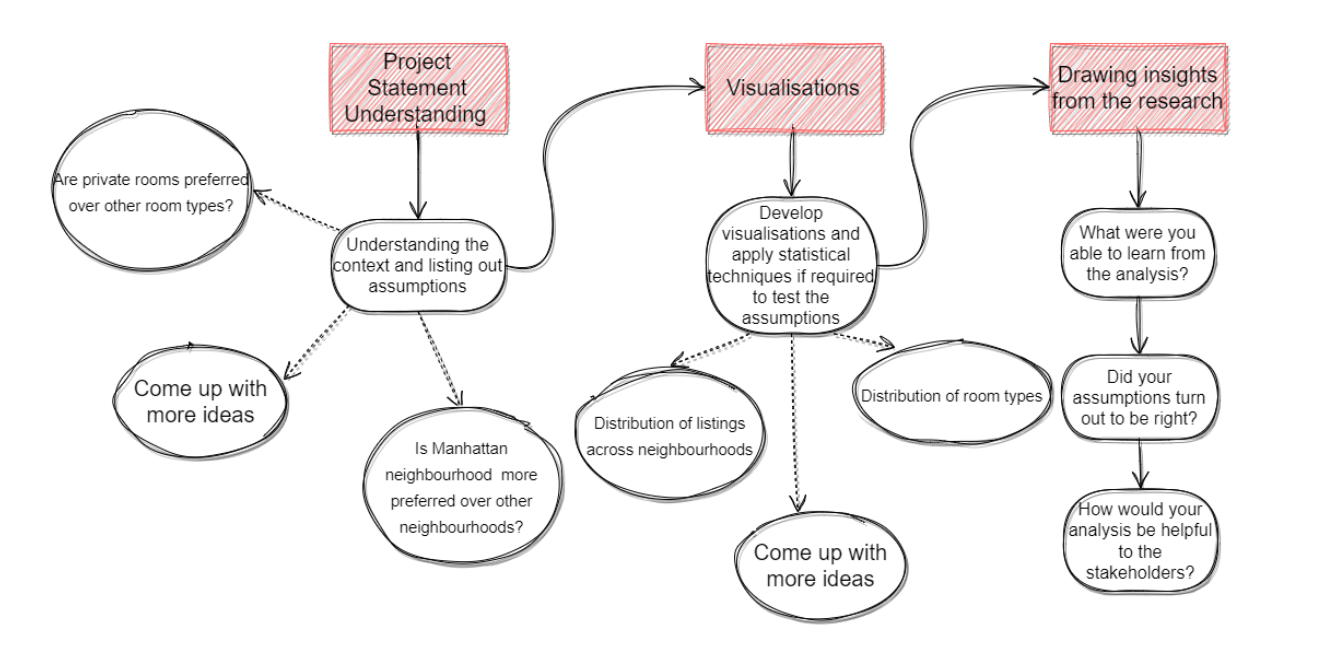

# **Pre-Processing**

### **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing Important Libararies**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for ploting graphs
import seaborn as sns # for drwaing statistcal plots
import folium # used to visualize a map using latitudes and longitudes
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

### **Loading Dataset**

In [4]:
path="/content/drive/MyDrive/Colab Notebooks/Capstone Projects/Airbnb Booking EDA/Airbnb NYC 2019.csv"

data=pd.read_csv(path)

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [7]:
# Cheking number of Rows and Columns

data.shape

(48895, 16)

### **Checking for NULL values**

In [8]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Four columns named host_name, name, last_review and reviews_per_month have null or missing values.Lets visualize them using heatmap.**

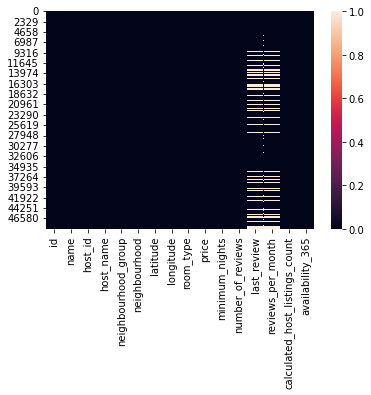

In [9]:
sns.heatmap(data.isnull())

### **Handling the NULL values**

In [10]:
# we can replace the null values in column review_per_month with zero.

data.fillna({'reviews_per_month':0},inplace=True)

In [11]:
# we do not have any option to replace the last date so we will simply replace it with zero.
data.fillna({'last_review':0},inplace=True)

In [12]:
# again re-checking the null values
data.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [13]:
#now we can not fill name or host name without proper knowledge and its also less in numbers, so we will drop the rows 

data.dropna(inplace=True)

In [14]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**Now you can clearly see that we have remove all the null values.**



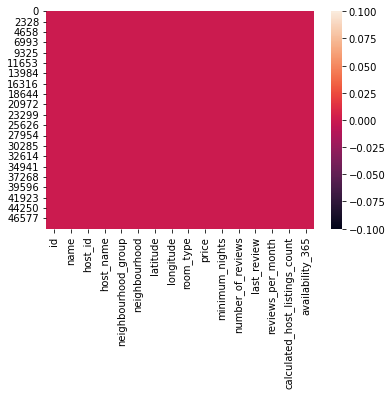

In [15]:
sns.heatmap(data.isnull())

**All the pre-processing work has been done and now data is ready for analysis. So without any further delay, Lets do it.**

# **Explorartory Data Analysis**

## **1. Feature Analysis**

**Lets start with analysing the  most important categorical variables i.e neighbourhood_group, room_type and neighbourhood.**

In [16]:
data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

There are five unique values for the categorical column neighbourhood_group i.e **Brooklyn, Manhattan, Queens, Staten Island and Bronx**

In [17]:
data['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

There is only three type of room i.e **Private room, Entire home/ apt and shared room**

In [18]:
data['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

### **Distribution of each room type in booking**

In [19]:
data['room_type'].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

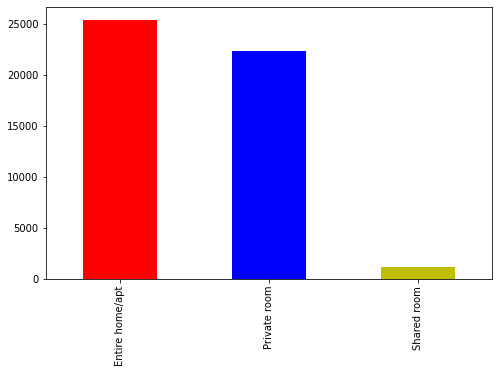

In [20]:
plt.figure(figsize=(8,5))
data['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])

**we can cleary say that more than 50% times Enitre home/apt are booked while 45% times Private room and very less time Shared room is booked.**

### **Distribution of neghbourhood_group**

In [21]:
data['neighbourhood_group'].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

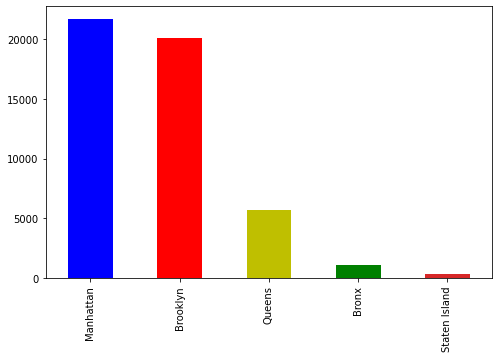

In [22]:
plt.figure(figsize=(8,5))
data['neighbourhood_group'].value_counts().plot(kind='bar',color=['b','r','y','g','C3'])

**people have almost booked 80% of the times in Manhattan and Brooklyn**

## **2. Statistical analysis**

In [23]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



**We can clearly see that minimum price is 0 , which is surprising as price 0 doesnt make sense to do business. So we will fill those zero value with median value according to the room type**

In [24]:
# For Entire home/apt Room type
data.loc[ (data.room_type=='Entire home/apt') & (data.price==0),'price']=data.loc[ (data.room_type=='Entire home/apt') & (data.price!=0),'price'].median()

# For Private room type
data.loc[ (data.room_type=='Private room') & (data.price==0),'price']=data.loc[ (data.room_type=='Private room') & (data.price!=0),'price'].median()

# For Shared room type
data.loc[ (data.room_type=='Shared room') & (data.price==0),'price']=data.loc[ (data.room_type=='Shared room') & (data.price!=0),'price'].median()


In [25]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.758729,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.224487,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**NOTE:  We can notice that we have succesfully updated the price column where we have values as 0 ,So now the minimum value now is $10. But the availability_365 column still have minimum value 0 as well 25 percentile is 0. It is very akward to see that room are not available more than 25 times in 100 times.**

In [26]:
percentage_of_data_having_availbility_0= round((len(data[data['availability_365']==0]['availability_365'])/len(data['availability_365']))*100,2)
print(f'the percentage of data having availibity as 0 is {percentage_of_data_having_availbility_0}')

the percentage of data having availibity as 0 is 35.83


**Almost 36% of data having availability days 0 is bit shocking , If you have a business of providing shelters for Airbnb your availibility is 0 days that is extreme case and extreme cases is obviously shocking when it comes 36% of data is having extreme case**

## **3. Price column analysis**

### **Average price of booking in all neighbourhood_group and in different room type**

In [27]:
avg_price_df = data.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.895706,58.610169
Brooklyn,178.379357,76.552109,50.745763
Manhattan,249.250341,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


**Observations: As we can see that manhattan is most costly and bronx is cheap for each room_type,**

**But I think we can make it more useful for buissness implimentation if we do some analysis on successfull hosts according to the heighest no of reviews so that we can suggest this price to our host for good buisness**

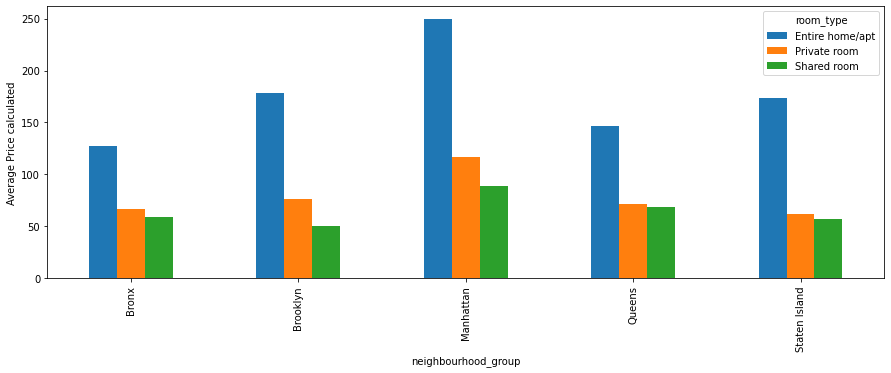

In [28]:
avg_price_df.plot.bar(figsize=(15,5),ylabel='Average Price calculated')

### **Distribution of price using boxplot across different room type**

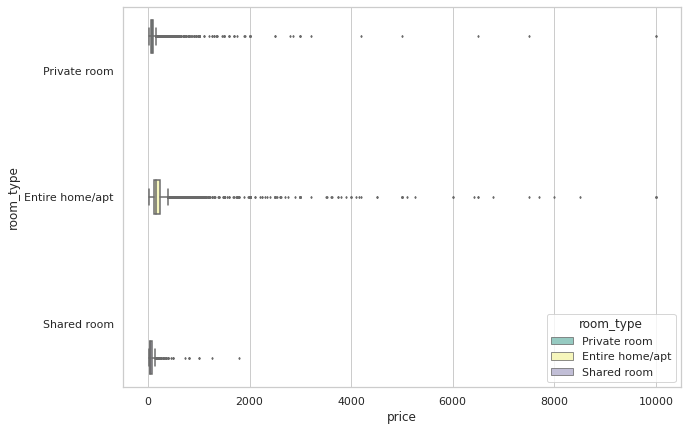

In [31]:
#How the price column is distributed over room_type and are there any Surprising items in price column ?
# from the previous exploration we get to know that price column is having many values as 0 as it doesnt make sense
# so we  will try to get rid of those instances for analysis of price column 
df_price=data[data['price']!=0].copy()
sns.set_theme(style='whitegrid')
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
sns.boxplot(y='room_type',x='price',hue='room_type',palette='Set3',linewidth=1.5,fliersize=1.5,data=df_price)

**we can notice that there are many outliers for price in each of the room_type category, so lets just why there is so high price or what else we can conclude for hosts having highest price for the rooms**

In [32]:
# lets check out the who is having highest price of all and we will check its rating, minimum nights, availability_365  and last reviews in order judge 

data[data['price']==data['price'].max()][['host_name','reviews_per_month','last_review','availability_365','price','neighbourhood_group']]

,host_name,reviews_per_month,last_review,availability_365,price,neighbourhood_group
9151,Kathrine,0.04,2016-02-13,0,10000,Queens
17692,Erin,0.16,2017-07-27,0,10000,Brooklyn
29238,Jelena,0.00,0,83,10000,Manhattan


**Clearly if i would have working in Airbnb I would have suggested the following**

**1) kathrine and Erin have price so high and having no availability then what is the benifit of keeping too high price .**

**2) The last review is also 2-3 years back (as the data was collected in 2019) which is also bad.**

**3) The review may be low as there may be very few people who is staying in kathrine, Erin and jelena apartment so might have less reviews per month.**

**4) I would have suggested to keep moderate(average) price so that more people would visit and stay in her appartment , it would also increase her reviews per month.**

## **4. Host Analysis**

### **Host with highest number of listed buildings on Airbnb**

In [33]:
data['host_name'].value_counts()

Michael            417
David              403
Sonder (NYC)       327
John               294
Alex               279
                  ... 
Femi & Toya          1
Nirit (Nina)         1
Louise & Thomas      1
Maneto               1
Ilgar & Aysel        1
Name: host_name, Length: 11450, dtype: int64

**Two different hosts can have similar name but they can not have same host_id, So we will try to find host has highest number of listed buliding using the unique host_id**

In [34]:
data["host_id"].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
26676357       1
43311385       1
544621         1
21573063       1
68119814       1
Name: host_id, Length: 37425, dtype: int64

**From this we can see that host name Michael its appearing 417 times in the host_name column , so this might imply that michael is having heighest number of rooms , but from the host_id column its showing heighest appearance of host_id 219517861 is 327 , so this clearly implies that there can be multiple person may have same name thats why we are getting different heighest apperance in host_name as compared to host_id**


**lets check which host_name is actually has the highest number of appartments**

In [35]:
data[data['host_id']==219517861]['host_name'].unique()

array(['Sonder (NYC)'], dtype=object)

So **Sonder (NYC)** is having maximum numbers of rooms listed for the guest, For Airbnb he might be very important person then.

In [36]:
df_sonder=data[data['host_name']=='Sonder (NYC)']
df_sonder[['host_name','neighbourhood_group','neighbourhood','latitude','longitude']]

,host_name,neighbourhood_group,neighbourhood,latitude,longitude
38293,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645
38294,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641
38588,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443
39769,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614
39770,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528
...,...,...,...,...,...
47691,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631
47692,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682
47693,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673
47814,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518


**so Sonder (NYC) is having multiple appartments in same building in different different neighbourhood**

### **Top 10 hosts that have obatained heighest no. of reviews**

In [37]:
host_highest_df=data.groupby(['host_id','host_name'],as_index=False)['number_of_reviews'].sum().sort_values(['number_of_reviews'],ascending = False)
host_highest_df.head(10)

,host_id,host_name,number_of_reviews
21294,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18619,26432133,Danielle,2017
20863,35524316,Yasu & Akiko,1971
21911,40176101,Brady,1818
7361,4734398,Jj,1798
14704,16677326,Alex And Zeena,1355
9199,6885157,Randy,1346
34615,219517861,Sonder (NYC),1281
17511,23591164,Angela,1269


**Maya is the most number of times rated host on Airbnb by Customers**

### **Which host are busiest and why?**

**we will keep only the availability_365 > 0, beacuse availability_365 =0 doesnt required for the analysis this availability_365=0 most probably listings have stopped thier buisness with Airbnb**

In [38]:
 df=data[data['availability_365']>0]

In [39]:
df['minimum_nights'].describe()

count    31350.000000
mean         8.308102
std         23.173477
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [40]:
# we will take minimum_nights <=365 only as it makes sense
df=df[df['minimum_nights']<=365]

**we can notice that there are some outliers in the minimum_nights as for availability_365 is calculated for the period of 365 days**

A metric is a system of measurement in this case 'busiest' which gives a relative comparision between the hosts. The metric defined below is a proxy to estimate the busyness of a host. The metric here using the fore-mentioned columns estimates the percentage of occupancy the property has seen in one period of business. The metric mean across various properties for a host gives the average occupancy rate/percentage the host. The higher the percentage, the busier a host is said to be.

The 3 columns afore-mentioend are taken into consideration for calculating this metric.

Firstly, the metric needs the available months (one period of business) the host is open for business/accepting bookings :-

available months = available days / (365/12)

For the given months the property is open for business, next is to estimate the maximum possible bookings a property can have through the available days, here the assumption is that, every customer stays exactly equal to minimum nights required by the listing :-

total possible bookings = available days / minimum nights

The next step is to estimate the actual number of bookings that occured in the year. The assumption made here is that the number of reviews recieved per month is analogous to that many customers on average booked/stayed in this property. Hence we will estimate bookings as :-

estimated bookings = reviews per month x available months Using all the above calculations, the percentage of occupancy throughout the year is gives as :-

occupancy % = estimated bookings / total possible bookings x 100

POINT TO NOTE - According to the assumptions and calculations done above to calculate the metric, a property with 1 customer over the entire period of business as the property's total possible booking records a 100% when the estimated bookings is also 1. In simpler terms, if the expected booking count is calculated to be 1 and the property hosts 1 customer, then the property is said to be 100% busy.

In [41]:
# designing the matrix for busy

avg_month_length = 30
df['availability_months'] = df.availability_365 / avg_month_length

df['max_possible_bookings'] = df.availability_365 / df.minimum_nights
df['booking_estimate'] = df.reviews_per_month * df.availability_months


df = df[df.booking_estimate <= df.max_possible_bookings]

df['occupancy_percentage'] = (df.booking_estimate / df.max_possible_bookings) * 100
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_months,max_possible_bookings,booking_estimate,occupancy_percentage
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,12.166667,365.000000,2.555000,0.700000
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,11.833333,355.000000,4.496667,1.266667
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,12.166667,121.666667,0.000000,0.000000
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,6.466667,194.000000,30.005333,15.466667
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,4.300000,43.000000,2.537000,5.900000


**The host_name column as discussed before contains repeating names, the calculated_host_listings_count gives us a fair idea of how many properties in total a host owns. The use of host_id as primary for the groupby function is the only way. Followed by host_name for groupby since the names of the hosts is important in the analysis. The mean is used as the aggregating function for the occupancy_percentage and price columns to get a fair idea about the general trend for each host, whereas for the neighbourhood_group and neighbourhood columns, the mode indicating the location where majority of host's properties reside, is used. The mode is chosen for the location columns because, the mode i.e. most frequent location for the property means the majority of contributions to the occupancy_percentage come from here.**

In [42]:
grouped = df[['host_id','host_name','occupancy_percentage','price','neighbourhood_group','neighbourhood']].groupby(['host_id','host_name'])

df_occupancy = grouped.agg({'occupancy_percentage':'mean','price':'mean','neighbourhood_group':pd.Series.mode,'neighbourhood':pd.Series.mode}).reset_index()

**The grouped table now contains the average occupany percentage for every host. Sorting the table to obtain the top 10 busiest hosts for Airbnb.**

In [43]:
df_occupancy.sort_values('occupancy_percentage',ascending=False).head(10)


,host_id,host_name,occupancy_percentage,price,neighbourhood_group,neighbourhood
5148,6602545,Eleni,100.0,160.0,Brooklyn,South Slope
10337,30933227,Dipti,100.0,130.0,Manhattan,Kips Bay
11676,43885531,Lee,100.0,130.0,Manhattan,East Village
1719,1349266,Adam,100.0,186.0,Brooklyn,Vinegar Hill
4438,5153401,Danielle,100.0,160.0,Brooklyn,Fort Greene
20445,257396181,Steven,100.0,250.0,Manhattan,Midtown
8816,21307389,Emma,100.0,250.0,Manhattan,Financial District
15211,105506002,Martin & Steve,100.0,44.0,Brooklyn,Williamsburg
18077,189994854,Ethan,100.0,110.0,Brooklyn,Gowanus
20855,263883589,Zach,100.0,329.0,Brooklyn,Boerum Hill


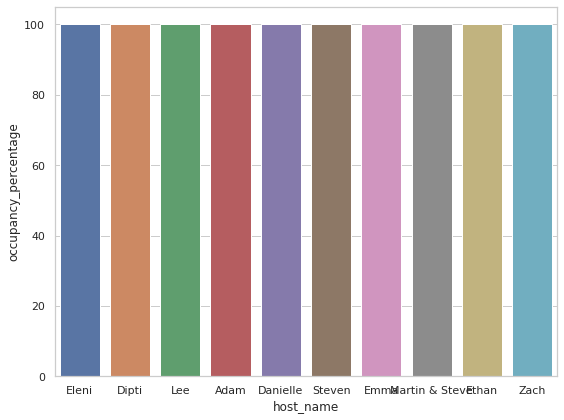

In [44]:
plt.figure(figsize=(8,6))
sorted_val=df_occupancy[['host_name','occupancy_percentage']].sort_values(by='occupancy_percentage',ascending=False).head(10)
sns.barplot(x='host_name',y='occupancy_percentage',data=sorted_val)
plt.tight_layout()

## **5. Neigbhourhood and Neighbourhood_group Analysis**

### **Top 3 costly neighbourhood in each neighbourhood group**

In [45]:
# top 3 neighbourhood in their respective neibhorhood group which are having maximum prices
df_manhattan=data[data['neighbourhood_group']=='Manhattan']
df_queens=data[data['neighbourhood_group']=='Queens']
df_brooklyn=data[data['neighbourhood_group']=='Brooklyn']
df_bronx=data[data['neighbourhood_group']=='Bronx']
df_staten=data[data['neighbourhood_group']=='Staten Island']

In [46]:
# top 3 costly neighbourhood in Manhattan neighbourhood group 

df_manhattan.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

,neighbourhood,price
0,Upper West Side,10000
1,East Harlem,9999
2,Lower East Side,9999


In [47]:
# top 3 csotly neighbourhood in Staten Island 

df_staten.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

,neighbourhood,price
0,Randall Manor,5000
1,Prince's Bay,1250
2,St. George,1000


In [48]:
# top 3 costly neighbourhood in bronx

df_bronx.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

,neighbourhood,price
0,Riverdale,2500
1,City Island,1000
2,Longwood,680


In [49]:
# top 3 costly neighbourhood in Queens

df_queens.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

,neighbourhood,price
0,Astoria,10000
1,Bayside,2600
2,Forest Hills,2350


In [50]:
# top 3 coslty neighbourhood in brooklyn

df_brooklyn.groupby(['neighbourhood'])['price'].max().sort_values(ascending=False).reset_index().head(3)

,neighbourhood,price
0,Greenpoint,10000
1,Clinton Hill,8000
2,East Flatbush,7500


### **Top 10 neighbourhood having maximum number of listed rooms/building for airbnb**

In [51]:
data['neighbourhood'].value_counts()

Williamsburg          3917
Bedford-Stuyvesant    3713
Harlem                2655
Bushwick              2462
Upper West Side       1969
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

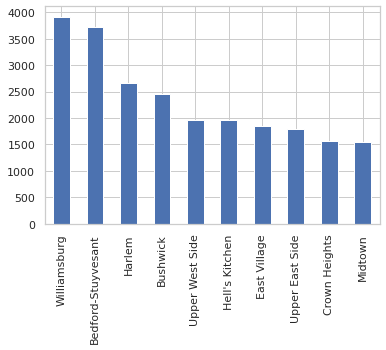

In [52]:
# plotting top 10 neighbourhood which are having maximum number of listed rooms/bulding for airbnb in the respective neighbourhood

pd.value_counts(data['neighbourhood'])[:10].plot.bar()


### **distribution of each room type in different neighbourhood_group**

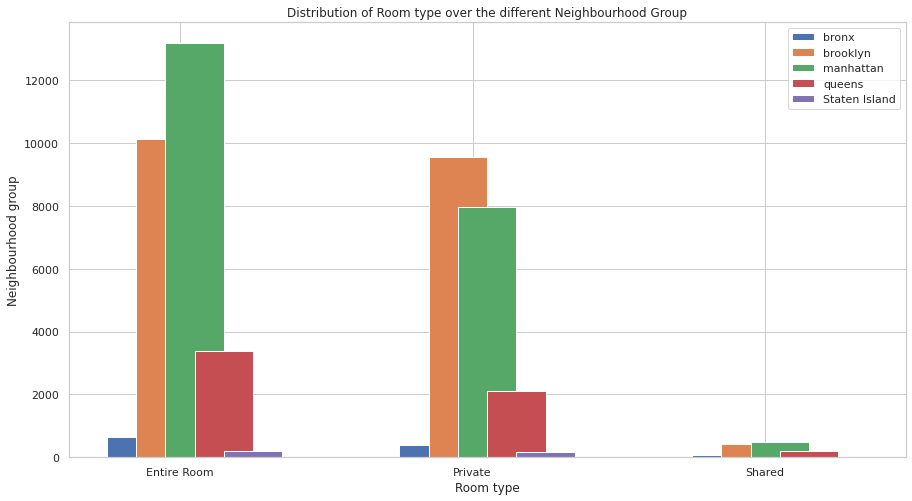

In [53]:

plt.figure(figsize=(15,8))
N=5  # number of bars in each category
ind = np.arange(3)
width=0.3

# storing the values of all values counts by the room_type for specific neighbourhood_group

bronx_values=df_bronx['room_type'].value_counts().values
brooklyn_values=df_brooklyn['room_type'].value_counts().values
manhattan_values=df_manhattan['room_type'].value_counts().values
queen_values=df_queens['room_type'].value_counts().values
staten_values=df_staten['room_type'].value_counts().values
# plotting the values 
plt.bar(ind,bronx_values,0.2,label='bronx')
plt.bar(ind+0.1,brooklyn_values,0.2,label='brooklyn')
plt.bar(ind+0.2,manhattan_values,0.2,label='manhattan')
plt.bar(ind+0.3,queen_values,0.2,label='queens')
plt.bar(ind+0.4,staten_values,0.2,label='Staten Island')
plt.xlabel('Room type')
plt.ylabel('Neighbourhood group')
plt.title('Distribution of Room type over the different Neighbourhood Group')

plt.xticks(ind + width / 2, ('Entire Room', 'Private', 'Shared'))

plt.legend(loc='best')
plt.show()

## **6. Neighbourhood relationship with reviews**

### **Top 10 Neighbourhood with highest number of review per month**

In [54]:
data.groupby(['neighbourhood'])['reviews_per_month'].max().sort_values(ascending=False).reset_index().head(10)

,neighbourhood,reviews_per_month
0,Theater District,58.50
1,Rosedale,20.94
2,Springfield Gardens,19.75
3,East Elmhurst,16.22
4,Jamaica,15.32
5,Williamsburg,14.00
6,Hell's Kitchen,14.00
7,Richmond Hill,13.42
8,Bushwick,13.33
9,South Ozone Park,13.27


### **Top 10 Neighbourhood having highest total number of reviews**

In [55]:
new_df=data.groupby(['neighbourhood'])['number_of_reviews'].sum().sort_values(ascending=False).reset_index().head(10)

In [57]:
new_df

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352
1,Williamsburg,85427
2,Harlem,75927
3,Bushwick,52508
4,Hell's Kitchen,49940
5,East Village,44642
6,East Harlem,36440
7,Crown Heights,36408
8,Upper West Side,36058
9,Upper East Side,31686


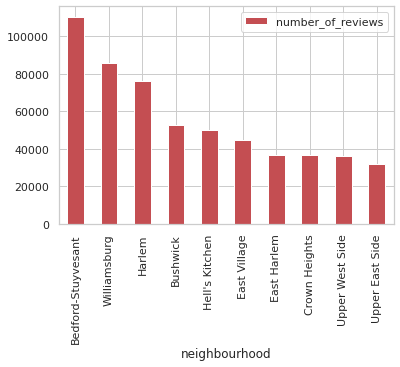

In [60]:
new_df.plot(kind='bar',x='neighbourhood',y='number_of_reviews',color='r')

## **7. Localtion and room_type analysis**

**First we will try to visualize the location of each apprtment using latitude and longitude values**

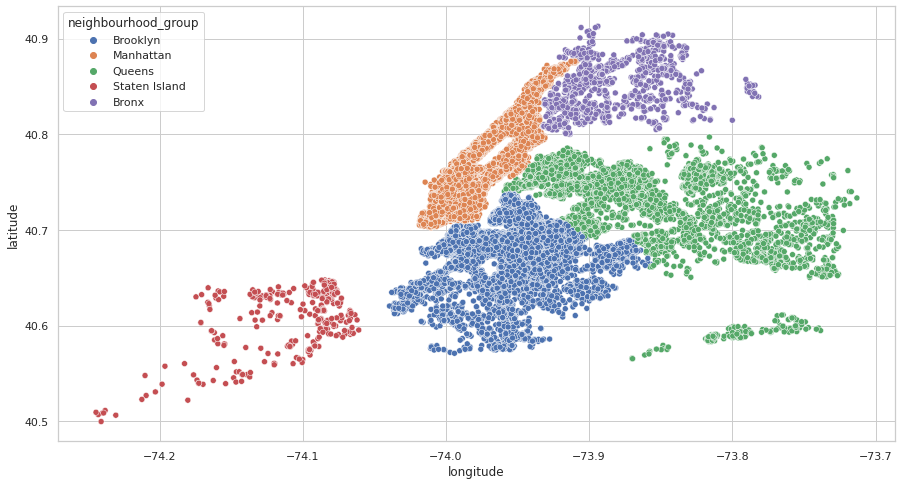

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['longitude'],y=data['latitude'], hue=data['neighbourhood_group'])
plt.show()

### **Distribution of room type acroos the locations on geomap**

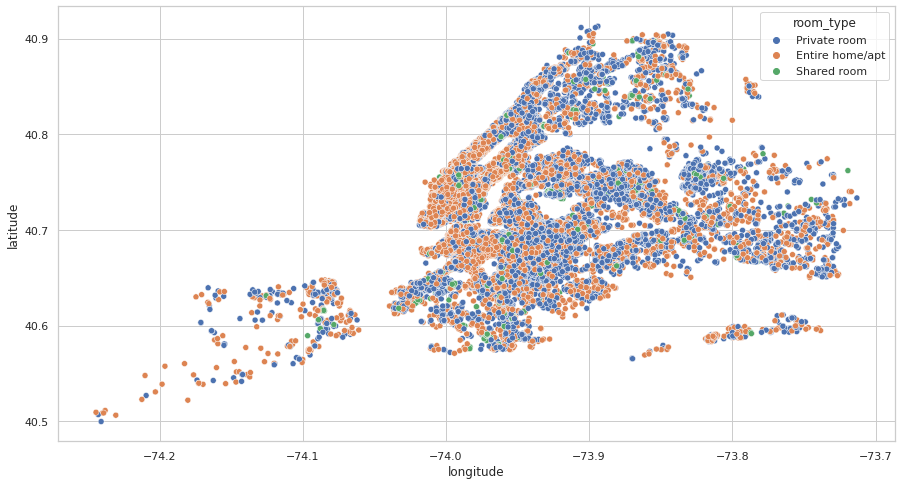

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=data['longitude'],y=data['latitude'], hue=data['room_type'])
plt.show()